# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Problem statement

In [ ]:
x=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']   #indepedent variables
y='price'   #Dependent variable or target variable
shape of df=(205, 26)

In [ ]:
sns.scatterplot(x=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],y=residual)

# Data Gathering

In [4]:
df_auto=pd.read_csv('autos_dataset.csv')
df_auto.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


# Exploratory Data Analysis(EDA)

In [5]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [171]:
# make a list of variable types
# numeric variables: discrete variables, continuous variable

discrete_variable = [var for var in df_auto.columns if df_auto[var].dtype != 'O' and df_auto[var].nunique() < 10]
continuous_variable = [var for var in df_auto.columns if df_auto[var].dtype != 'O' and var not in discrete_variable]

# categorical variables
categorical_variable = [var for var in df_auto.columns if df_auto[var].dtype == 'O']

print('There are {} discrete variables'.format((discrete_variable)))
print('There are {} continuous variables'.format((continuous_variable)))
print('There are {} categorical variables'.format((categorical_variable)))

There are ['symboling'] discrete variables
There are ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'] continuous variables
There are ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price'] categorical variables


In [170]:
df_auto['make']!='O'

0      True
1      True
2      True
3      True
4      True
       ... 
200    True
201    True
202    True
203    True
204    True
Name: make, Length: 205, dtype: bool

In [6]:
df_auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
df_auto.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Feature Engineering

In [8]:
df_auto['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [9]:
df_auto['normalized-losses']

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [10]:
df_auto.replace({'?':np.nan},inplace=True)

In [11]:
df_auto['normalized-losses']=df_auto['normalized-losses'].fillna(df_auto['normalized-losses'].median()).astype(int)
df_auto['normalized-losses']

0      115
1      115
2      115
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: int32

In [12]:
df_auto['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [13]:
df_auto['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [14]:
df_auto['fuel-type']=df_auto['fuel-type'].replace({'gas':1,'diesel':0})
df_auto['fuel-type']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fuel-type, Length: 205, dtype: int64

In [129]:
fuel_type_values={'gas':1,'diesel':0}

In [15]:
df_auto['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [16]:
df_auto['aspiration']=df_auto['aspiration'].replace({'std':1,'turbo':0})
df_auto['aspiration']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    0
202    1
203    0
204    0
Name: aspiration, Length: 205, dtype: int64

In [17]:
df_auto['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [18]:
df_auto['num-of-doors'].isna().sum()

2

In [19]:
df_auto['num-of-doors']=df_auto['num-of-doors'].replace({'four':4,'two':2})
df_auto['num-of-doors']

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name: num-of-doors, Length: 205, dtype: float64

In [20]:
df_auto['num-of-doors'].fillna(df_auto['num-of-doors'].mode()[0],inplace=True)
df_auto['num-of-doors']

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name: num-of-doors, Length: 205, dtype: float64

In [21]:
df_auto['num-of-doors'].isna().sum()

0

In [97]:
num_of_doors_values = {'four': 4, 'two': 2}

In [22]:
df_auto['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [23]:
df_auto=pd.get_dummies(df_auto,columns=['body-style'])
df_auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115,alfa-romero,1,1,2.0,rwd,front,88.6,168.8,...,111,5000,21,27,13495,1,0,0,0,0
1,3,115,alfa-romero,1,1,2.0,rwd,front,88.6,168.8,...,111,5000,21,27,16500,1,0,0,0,0
2,1,115,alfa-romero,1,1,2.0,rwd,front,94.5,171.2,...,154,5000,19,26,16500,0,0,1,0,0
3,2,164,audi,1,1,4.0,fwd,front,99.8,176.6,...,102,5500,24,30,13950,0,0,0,1,0
4,2,164,audi,1,1,4.0,4wd,front,99.4,176.6,...,115,5500,18,22,17450,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,1,4.0,rwd,front,109.1,188.8,...,114,5400,23,28,16845,0,0,0,1,0
201,-1,95,volvo,1,0,4.0,rwd,front,109.1,188.8,...,160,5300,19,25,19045,0,0,0,1,0
202,-1,95,volvo,1,1,4.0,rwd,front,109.1,188.8,...,134,5500,18,23,21485,0,0,0,1,0
203,-1,95,volvo,0,0,4.0,rwd,front,109.1,188.8,...,106,4800,26,27,22470,0,0,0,1,0


In [24]:
df_auto['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [25]:
df_auto['drive-wheels']=df_auto['drive-wheels'].replace({'fwd':2,'rwd':1,'4wd':0})
df_auto['drive-wheels']

0      1
1      1
2      1
3      2
4      0
      ..
200    1
201    1
202    1
203    1
204    1
Name: drive-wheels, Length: 205, dtype: int64

In [26]:
df_auto['engine-location'].isna().sum()

0

In [27]:
df_auto['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [28]:
df_auto['engine-location']=df_auto['engine-location'].replace({'front':1,'rear':0})
df_auto['engine-location']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    1
204    1
Name: engine-location, Length: 205, dtype: int64

In [29]:
df_auto['wheel-base'].isna().sum()

0

In [30]:
df_auto['length'].isna().sum()

0

In [31]:
df_auto['width'].isna().sum()

0

In [32]:
df_auto['height'].isna().sum()

0

In [33]:
df_auto['curb-weight']

0      2548
1      2548
2      2823
3      2337
4      2824
       ... 
200    2952
201    3049
202    3012
203    3217
204    3062
Name: curb-weight, Length: 205, dtype: int64

In [34]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

In [35]:
df_auto['engine-type']

0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: engine-type, Length: 205, dtype: object

In [36]:
df_auto['engine-type'].isna().sum()

0

In [70]:
df_auto['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [37]:
df_auto=pd.get_dummies(df_auto,columns=['engine-type'])
df_auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,115,alfa-romero,1,1,2.0,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
1,3,115,alfa-romero,1,1,2.0,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
2,1,115,alfa-romero,1,1,2.0,1,1,94.5,171.2,...,1,0,0,0,0,0,0,0,1,0
3,2,164,audi,1,1,4.0,2,1,99.8,176.6,...,0,1,0,0,0,0,1,0,0,0
4,2,164,audi,1,1,4.0,0,1,99.4,176.6,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,1,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
201,-1,95,volvo,1,0,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
202,-1,95,volvo,1,1,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,0,0,1,0
203,-1,95,volvo,0,0,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0


In [38]:
df_auto['num-of-cylinders']

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 205, dtype: object

In [39]:
df_auto['num-of-cylinders'].isna().sum()

0

In [40]:
print(df_auto['num-of-cylinders'].value_counts().to_dict())

{'four': 159, 'six': 24, 'five': 11, 'eight': 5, 'two': 4, 'three': 1, 'twelve': 1}


In [41]:
df_auto['num-of-cylinders']=df_auto['num-of-cylinders'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 
                                                                  'two': 2, 'three': 3, 'twelve': 12})
df_auto['num-of-cylinders']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: num-of-cylinders, Length: 205, dtype: int64

In [98]:
num_of_cylinders_values = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 
                                'two': 2, 'three': 3, 'twelve': 12}

In [42]:
df_auto['fuel-system'].isna().sum()

0

In [43]:
df_auto['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [44]:
df_auto=pd.get_dummies(df_auto,columns=['fuel-system'])
df_auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115,alfa-romero,1,1,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,3,115,alfa-romero,1,1,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,1,115,alfa-romero,1,1,2.0,1,1,94.5,171.2,...,1,0,0,0,0,0,0,1,0,0
3,2,164,audi,1,1,4.0,2,1,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,2,164,audi,1,1,4.0,0,1,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,1,4.0,1,1,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,volvo,1,0,4.0,1,1,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,volvo,1,1,4.0,1,1,109.1,188.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,95,volvo,0,0,4.0,1,1,109.1,188.8,...,0,0,0,0,0,1,0,0,0,0


In [45]:
df_auto['bore'].isna().sum()

4

In [46]:
df_auto['bore']=df_auto['bore'].fillna(df_auto['bore'].median()).astype(float)
df_auto['bore']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: float64

In [47]:
df_auto['bore'].isna().sum()

0

In [48]:
df_auto['stroke']=df_auto['stroke'].fillna(df_auto['stroke'].median()).astype(float)
df_auto['stroke']

0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: float64

In [49]:
df_auto['compression-ratio'].isna().sum()

0

In [50]:
df_auto['horsepower'].isna().sum()

2

In [51]:
df_auto['horsepower']=df_auto['horsepower'].fillna(df_auto['horsepower'].median()).astype(float)
df_auto['horsepower']

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

In [52]:
df_auto['horsepower'].isna().sum()

0

In [53]:
df_auto['peak-rpm'].isna().sum()

2

In [54]:
df_auto['peak-rpm']=df_auto['peak-rpm'].fillna(df_auto['peak-rpm'].median()).astype(int)
df_auto['peak-rpm']

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak-rpm, Length: 205, dtype: int32

In [55]:
df_auto['price'].isna().sum()

4

In [56]:
df_auto['price']=df_auto['price'].fillna(df_auto['price'].median()).astype(int)
df_auto['price']

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

In [57]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

# Linearity

### Coefficient of coorelation

In [58]:
df_auto.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.457484,0.194311,0.059866,-0.663595,0.111150,-0.212471,-0.531954,-0.357612,-0.232919,...,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
normalized-losses,0.457484,1.000000,0.104668,0.011273,-0.348850,-0.133824,0.021510,-0.073709,-0.006837,0.058378,...,0.130717,0.130721,-0.122539,-0.123927,0.112927,-0.104668,0.053844,0.179458,0.052231,-0.012358
fuel-type,0.194311,0.104668,1.000000,0.401397,-0.188496,0.051874,-0.040070,-0.308346,-0.212679,-0.233880,...,0.085556,0.046383,0.078293,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,0.059866,0.011273,0.401397,1.000000,-0.052803,0.153897,-0.057191,-0.257611,-0.234539,-0.300567,...,0.070070,0.066203,0.111748,0.323378,0.057191,-0.401397,-0.149190,0.050041,-0.394703,0.032857
num-of-doors,-0.663595,-0.348850,-0.188496,-0.052803,1.000000,0.003230,0.139129,0.439635,0.385675,0.197735,...,-0.054764,-0.161052,-0.097150,0.013769,-0.139129,0.188496,-0.079932,0.035746,-0.148565,-0.079932
drive-wheels,0.111150,-0.133824,0.051874,0.153897,0.003230,1.000000,0.113823,-0.366828,-0.416076,-0.376554,...,-0.139453,-0.131758,0.188341,0.310901,-0.113823,-0.051874,0.055378,-0.369782,0.128419,-0.065393
engine-location,-0.212471,0.021510,-0.040070,-0.057191,0.139129,0.113823,1.000000,0.187790,0.050989,0.051698,...,0.031711,0.017192,0.029019,0.083975,0.014851,0.040070,0.008532,-0.132429,0.026114,0.008532
wheel-base,-0.531954,-0.073709,-0.308346,-0.257611,0.439635,-0.366828,0.187790,1.000000,0.874587,0.795144,...,0.166152,-0.081174,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
length,-0.357612,-0.006837,-0.212679,-0.234539,0.385675,-0.416076,0.050989,0.874587,1.000000,0.841118,...,0.244053,-0.057877,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
width,-0.232919,0.058378,-0.233880,-0.300567,0.197735,-0.376554,0.051698,0.795144,0.841118,1.000000,...,0.348869,-0.013699,-0.194078,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158


<AxesSubplot:>

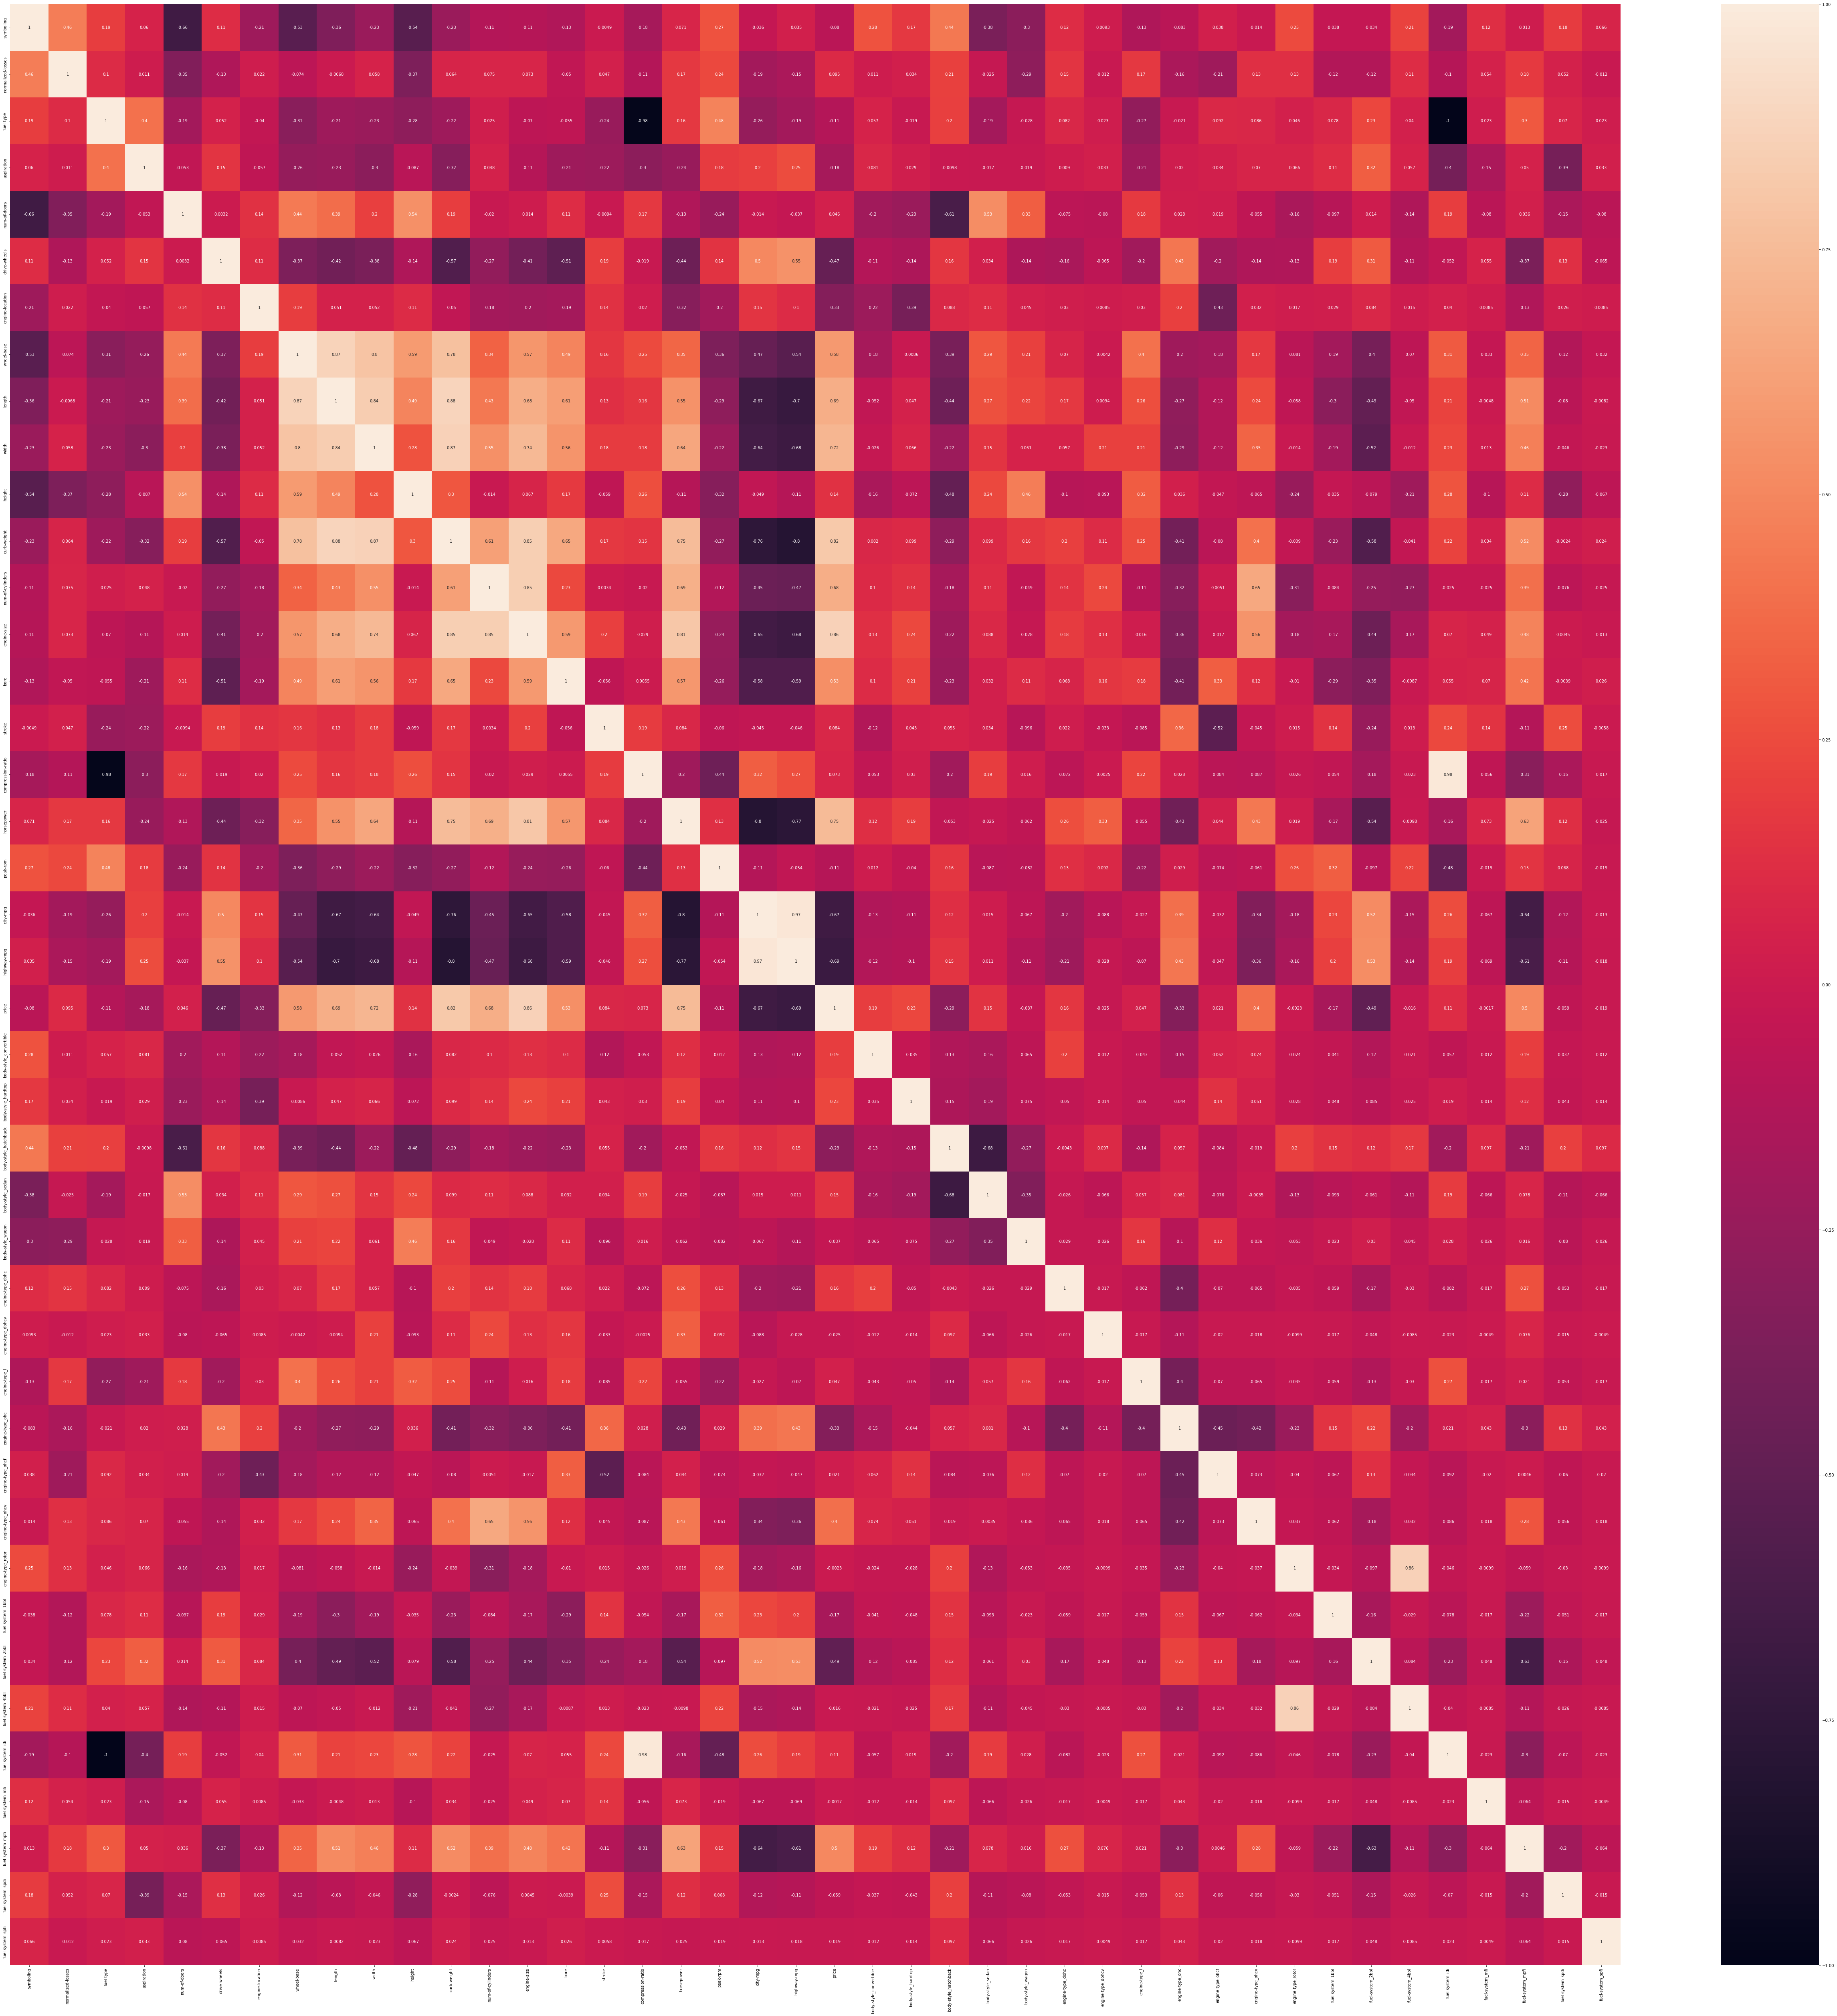

In [112]:
plt.figure(figsize=(90,90))
sns.heatmap(df_auto.corr(),annot=True)

In [59]:
df_auto=df_auto.select_dtypes(exclude=object)
x=df_auto.drop('price',axis=1)
y=df_auto['price']


# No multicollinearity

C:\Users\Manjusha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<AxesSubplot:>

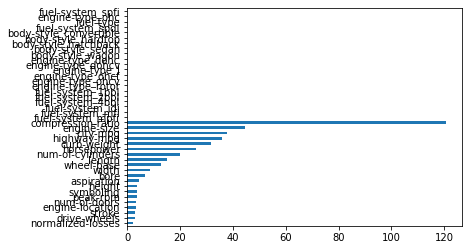

In [60]:
vif_list=[]

for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
    
s1=pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind='barh')

# Data Split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)


# Model training

In [62]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [63]:
lin_reg_model.coef_

array([ 1.77997825e+02,  4.15945873e+00, -1.11358878e+04, -1.66957034e+03,
       -2.77528345e+02,  4.66056081e+01, -1.16016256e+04,  2.47709077e+01,
       -2.84846613e+01,  3.50776584e+02,  2.60637513e+02,  8.19054508e+00,
        1.27989908e+03,  1.03976322e+02, -2.43786167e+03, -3.69049279e+03,
       -1.79893837e+03,  3.72376102e+00,  2.21636968e+00,  2.14539620e+02,
        9.21326204e+01,  3.50852884e+03, -1.38287164e+03, -8.16242740e+02,
        4.93829439e+02, -1.80324390e+03,  7.15285063e+02, -1.76095821e+04,
       -5.74541115e+02,  3.14170443e+03,  2.85849833e+03, -4.50726022e+03,
        1.59758956e+04, -3.90435032e+02, -1.77088750e+02, -2.28122197e+03,
        1.11358878e+04, -4.69533088e+03,  3.40811488e+01, -3.62589228e+03,
        0.00000000e+00])

In [64]:
lin_reg_model.intercept_

-22897.325977028962

# Testing Data Results

In [65]:
y_pred=lin_reg_model.predict(x_test)   #Testing data

MSE=mean_squared_error(y_test,y_pred)
print('The MSE value is:',MSE)

RMSE=np.sqrt(MSE)
print('The RMSE value is:',RMSE)

MAE=mean_absolute_error(y_test,y_pred)
print('The MAE value is:',MAE)

r_squared=r2_score(y_test,y_pred)
print('The r_squared value is:',r_squared)

The MSE value is: 13524563.76802498
The RMSE value is: 3677.575800445856
The MAE value is: 2693.745800518357
The r_squared value is: 0.7805511556283853


# Training Data Results

In [66]:
y_pred_train=lin_reg_model.predict(x_train)   #Training data

MSE=mean_squared_error(y_train,y_pred_train)
print('The MSE value is:',MSE)

RMSE=np.sqrt(MSE)
print('The RMSE value is:',RMSE)

MAE=mean_absolute_error(y_train,y_pred_train)
print('The MAE value is:',MAE)

r_squared=r2_score(y_train,y_pred_train)
print('The r_squared value is:',r_squared)

The MSE value is: 4368712.400057461
The RMSE value is: 2090.1465020561263
The MAE value is: 1522.7310498209954
The r_squared value is: 0.9292551879085289


# Normality of residual

In [67]:
residual=(y_train-y_pred_train)
residual

109    -246.444032
60    -3070.862678
126    -750.000000
27    -2829.795693
40      688.025432
          ...     
151    -555.412555
67    -1039.717990
25       60.353325
196    -825.835277
175    1763.357602
Name: price, Length: 164, dtype: float64

### KDE plot

<AxesSubplot:xlabel='price', ylabel='Density'>

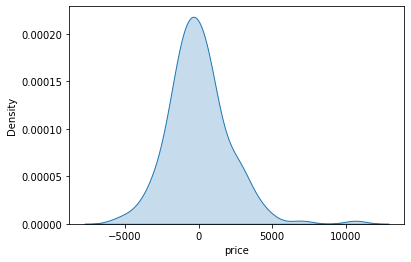

In [69]:
sns.kdeplot(residual,fill=True)

In [70]:
residual.mean()

1.3309678562530658e-11

In [71]:
residual.median()

-91.34425004003242

In [72]:
residual.mode()[0]

-5492.434886294752

## Skewness

In [73]:
from scipy.stats import skew

In [74]:
skewness=skew(residual)
skewness

0.9944788291673876

## Shapiro

In [75]:
from scipy.stats import shapiro

In [76]:
_,p_val=shapiro(residual)
print(p_val)

if p_val>=0.05:
    print("Data is normally distributed")
else:
    print('Data is not normally distributed')

8.951263225753792e-06
Data is not normally distributed


## kstest

In [77]:
from scipy.stats import kstest

In [78]:
_,p_val=kstest(residual,'norm')
print(p_val)

if p_val>=0.05:
    print("Data is normally distributed")
else:
    print('Data is not normally distributed')

1.5694973182095338e-42
Data is not normally distributed


## normaltest

In [79]:
from scipy.stats import normaltest

In [80]:
_,p_val=normaltest(residual)
print(p_val)

if p_val>=0.05:
    print("Data is normally distributed")
else:
    print('Data is not normally distributed')

6.396494064921145e-10
Data is not normally distributed


# Q-Q plot

In [81]:
import statsmodels.api as sm

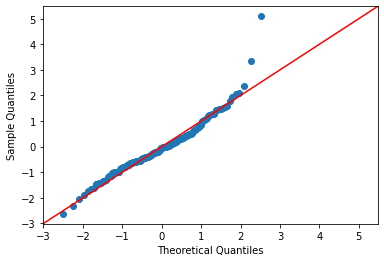

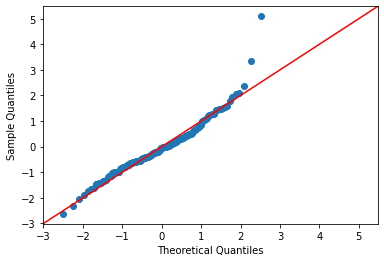

In [82]:
sm.qqplot(residual,line='45',fit=True)

# Homomscedasticity

<AxesSubplot:xlabel='price', ylabel='price'>

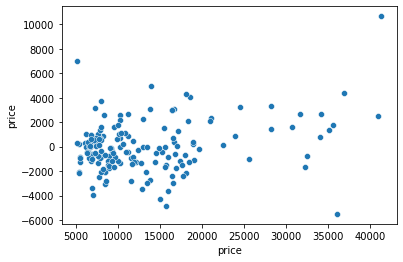

In [83]:
sns.scatterplot(x=y_train,y=residual)

# Testing on single row

In [85]:
lin_reg_model.feature_names_in_

array(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'], dtype=object)

In [86]:
x.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')

In [95]:
x

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115,1,1,2.0,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,115,1,1,2.0,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,115,1,1,2.0,1,1,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164,1,1,4.0,2,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164,1,1,4.0,0,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,1,1,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,1,0,4.0,1,1,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,1,1,4.0,1,1,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95,0,0,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [90]:
symboling= 
normalized_losses= 
fuel_type= 
aspiration=
num_of_doors=
drive_wheels= 
engine_location= 
wheel_base=
length=
width=
height=
curb_weight=
num_of_cylinders=
engine_size= 
bore= 
stroke= 
compression_ratio= 
horsepower=
peak_rpm=
city_mpg= 
highway_mpg= 
body_style_convertible=
body_style_hardtop= 
body_style_hatchback= 
body_style_sedan=
body_style_wagon= 
engine_type_dohc= 
engine_type_dohcv=
engine_type_l= 
engine_type_ohc= 
engine_type_ohcf=
engine_type_ohcv= 
engine_type_rotor= 
fuel_system_1bbl=
fuel_system_2bbl= 
fuel_system_4bbl= 
fuel_system_idi=
fuel_system_mfi= 
fuel_system_mpfi= 
fuel_system_spdi=
fuel_system_spfi=

SyntaxError: invalid syntax (399614325.py, line 1)

In [142]:
symboling=2.0
normalized_losses=170.0
fuel_type='gas'
aspiration=1.0
num_of_doors='two'
drive_wheels=1.0
engine_location=1.0
wheel_base=101.2
length=176.8
width=64.8
height=54.3
curb_weight=2395.0
num_of_cylinders='eight'
engine_size=108.0
bore=3.5
stroke=2.8
compression_ratio=8.8
horsepower=101.0
peak_rpm=5800.0
city_mpg=23.0
highway_mpg=29.0
body_style = 'body-style_'+"sedan"
engine_type= 'engine-type_'+"ohc"
fuel_system ='fuel-system_'+"mfi"
print(body_style)
print(engine_type)
print(fuel_system)

body-style_sedan
engine-type_ohc
fuel-system_mfi


In [143]:
print(num_of_doors_values)
print(num_of_cylinders_values)
print(fuel_type_values)

{'four': 4, 'two': 2}
{'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}
{'gas': 1, 'diesel': 0}


In [172]:
label_encoded_columns = {"Num_of_Doors" :num_of_doors_values,
                       "num_of_cylinders_values" :num_of_cylinders_values,
                        "fuel_type_values":fuel_type_values,
                        "Columns" : list(x.columns)}
label_encoded_columns

{'Num_of_Doors': {'four': 4, 'two': 2},
 'num_of_cylinders_values': {'four': 4,
  'six': 6,
  'five': 5,
  'eight': 8,
  'two': 2,
  'three': 3,
  'twelve': 12},
 'fuel_type_values': {'gas': 1, 'diesel': 0},
 'Columns': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'body-style_convertible',
  'body-style_hardtop',
  'body-style_hatchback',
  'body-style_sedan',
  'body-style_wagon',
  'engine-type_dohc',
  'engine-type_dohcv',
  'engine-type_l',
  'engine-type_ohc',
  'engine-type_ohcf',
  'engine-type_ohcv',
  'engine-type_rotor',
  'fuel-system_1bbl',
  'fuel-system_2bbl',
  'fuel-system_4bbl',
  'fuel-system_idi',
  'fuel-system_mfi',
  'fuel-system_mpfi',
  'fuel-system_spdi',
  'fuel-system_s

In [173]:
import json

with open("Label_Encoded_Columns.json",'w') as f:
    json.dump(label_encoded_columns,f)

In [169]:
column_names=x.columns
print(column_names)

array=np.zeros(len(x.columns),dtype=int)
print(array)

no_of_doors = num_of_doors_values[num_of_doors]
print(no_of_doors)
no_of_cylinders = num_of_cylinders_values[num_of_cylinders]
print(no_of_cylinders)
fuel_type_new = fuel_type_values[fuel_type]
print(fuel_type_new)

array[0] = symboling
array[1] =normalized_losses
array[2] =fuel_type_new
array[3] =aspiration
array[4] = no_of_doors
array[5] =drive_wheels 
array[6] =engine_location 
array[7] =wheel_base
array[8] =length 
array[9] =width 
array[10] =height 
array[11] =curb_weight 
array[12] =no_of_cylinders
array[13] =engine_size 
array[14] =bore 
array[15] =stroke
array[16] =compression_ratio 
array[17] =horsepower
array[18] =peak_rpm 
array[19] =city_mpg
array[20] =highway_mpg

# print(array)

body_style_index=np.where(column_names == body_style)
print(body_style_index[0][0])
engine_type_index=np.where(column_names == engine_type)
print(engine_type_index[0][0])
fuel_system_index=np.where(column_names == fuel_system)
print(fuel_system_index[0][0])

array[body_style_index]=1
array[engine_type_index]=1
array[fuel_system_index]=1

print(array)

y_new_pred=lin_reg_model.predict([array])[0]
y_new_pred

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
2
8
1
24
29
37
[   2  170    1    1    2    1    1  101  176   64   54 2395    8  108
    3    2    8  

C:\Users\Manjusha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


19039.348749996443

In [170]:
import pickle

In [171]:
with open('auto_lin_model.pkl','wb') as f:
    pickle.dump(lin_reg_model,f)